<a href="https://colab.research.google.com/github/Himali-Silwadiya/Machine_Learning/blob/main/or_gate_legend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trained weights: [-0.1  0.1  0.1]


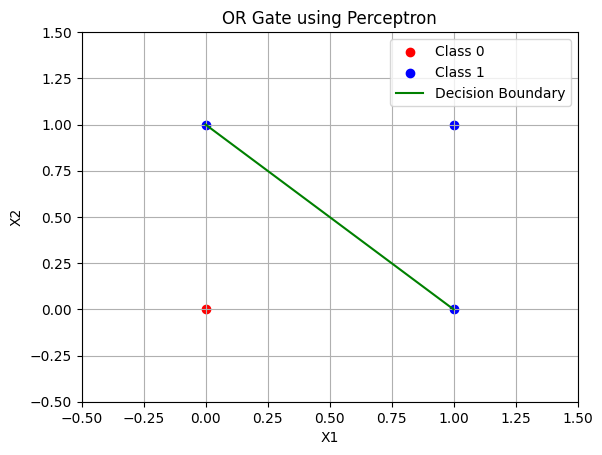

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, ip, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = np.zeros(ip + 1)  # includes bias

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = self.weights.T.dot(x)
        return self.activation_fn(z)

    def fit(self, X, Y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                x_i = np.insert(X[i], 0, 1)  # insert bias term
                y_pred = self.predict(x_i)
                error = Y[i] - y_pred
                self.weights += self.lr * error * x_i

if __name__ == '__main__':
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    Y = np.array([0, 1, 1, 1])  # OR gate output

    model = Perceptron(ip=2, lr=0.1, epochs=100)
    model.fit(X, Y)

    print("Trained weights:", model.weights)

    # Plotting
    for i in range(len(X)):
        if Y[i] == 0:
            plt.scatter(X[i][0], X[i][1], color='red', label='Class 0' if i == 0 else "")
        else:
            plt.scatter(X[i][0], X[i][1], color='blue', label='Class 1' if i == 1 else "")

    # Decision boundary: w0 + w1*x1 + w2*x2 = 0 => x2 = -(w0 + w1*x1)/w2
    x_vals = np.array([0, 1])
    w = model.weights
    if w[2] != 0:
        y_vals = -(w[0] + w[1] * x_vals) / w[2]
        plt.plot(x_vals, y_vals, label='Decision Boundary', color='green')

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("OR Gate using Perceptron")
    plt.legend()
    plt.grid(True)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.show()
